In [226]:
import pandas as pd

In [227]:
columns_names = ['year', "jday", "month", "day", "hour","min", "dt", "zen", "dw_solar", "uw_solar",
	"direct_n", "diffuse", "dw_ir", "dw_casetemp", "dw_dometemp", "uw_ir", "uw_casetemp", "uw_dometemp", "uvb", "par", "netsolar", "netir", "totalnet",
    "temp", "rh", "windspd", "winddir", "pressure"]

In [229]:
df = pd.read_table("./Challenge1-Solaire/data/2019/tbl19001_nico.dat")

# Clean the data

In [230]:
tab_19001 = pd.read_table("./Challenge1-Solaire/data/2019/tbl19001_nico.dat", delim_whitespace=True, skiprows=2, 
              names = ["year","jday", "month", "day", "hour", "min", "dt", "zen", "dw_solar", "dw_solar_quality", "uw_solar", 
                       "uw_solar_quality", "direct_n", "direct_n_quality", "diffuse", "diffuse_quality", "dw_ir", 
                       "dw_ir_quality", "dw_casetemp", "dw_casetemp_quality", "dw_dometemp", "dw_dometemp_quality", 
                       "uw_ir", "uw_ir_quality", "uw_casetemp", "uw_casetemp_quality", "uw_dometemp", "uw_dometemp_quality", 
                       "uvb", "uvb_quality", "par", "par_quality", "netsolar", "netsolar_quality", "netir", "netir_quality", 
                       "totalnet", "totalnet_quality", "temp", "temp_quality", "rh", "rh_quality", "windspd", "windspd_quality", 
                       "winddir", "winddir_quality", "pressure", "pressure_quality"])


In [231]:
tab_19001

,year,jday,month,day,hour,min,dt,zen,dw_solar,dw_solar_quality,...,temp,temp_quality,rh,rh_quality,windspd,windspd_quality,winddir,winddir_quality,pressure,pressure_quality
0,2019,1,1,1,0,0,0.000,93.23,-0.4,0,...,-13.9,0,90.6,0,5.3,0,39.8,0,832.4,0
1,2019,1,1,1,0,1,0.017,93.40,-0.5,0,...,-13.9,0,88.6,0,6.7,0,38.2,0,832.5,0
2,2019,1,1,1,0,2,0.033,93.57,-0.5,0,...,-14.0,0,87.6,0,5.9,0,27.0,0,832.5,0
3,2019,1,1,1,0,3,0.050,93.74,-0.5,0,...,-14.0,0,86.1,0,6.1,0,30.9,0,832.5,0
4,2019,1,1,1,0,4,0.067,93.91,-0.5,0,...,-14.0,0,85.7,0,6.2,0,31.8,0,832.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2019,1,1,1,23,55,23.917,92.25,1.8,0,...,-14.6,0,77.3,0,1.7,0,232.4,0,828.8,0
1436,2019,1,1,1,23,56,23.933,92.42,1.5,0,...,-14.6,0,77.3,0,1.7,0,232.2,0,828.8,0
1437,2019,1,1,1,23,57,23.950,92.59,1.4,0,...,-14.7,0,77.4,0,1.8,0,234.1,0,828.8,0
1438,2019,1,1,1,23,58,23.967,92.76,1.1,0,...,-14.7,0,77.4,0,1.9,0,233.4,0,828.8,0


The data we want to predict is the dw_solar which takes the value $-9999.99$ when there are no data.

We change the value to $None$ to plot correctly our values.

In [232]:
tab_19001["dw_solar"][tab_19001["dw_solar"]< -1000] = None

/var/folders/94/wd55l2gx34v1rjc4367bnnnh0000gn/T/ipykernel_1759/4261041177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab_19001["dw_solar"][tab_19001["dw_solar"]< -1000] = None


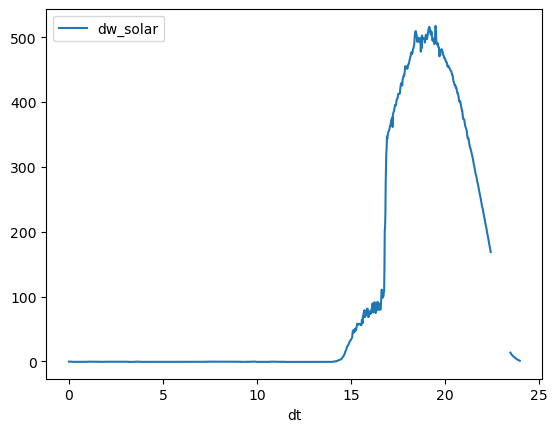

In [234]:
tab_19001.plot(x = "dt", y = "dw_solar");

In [ ]:
for h in range(24) :
    if tab_19001[h <= tab_19001["dt"] < h+1]